# Exploring Data with Python"

## Exploring data arrays with NumPy*

In [1]:
data = [50, 47, 49, 33, 42]
print(data)

[50, 47, 49, 33, 42]


##### list

In [2]:
import numpy as np

grades = np.array(data)
print(grades)

[50 47 49 33 42]


##### Numpy array

In [3]:
print(type(data), 'x 2', data*2)
print('---')
print(type(grades), 'x 2', grades*2)

<class 'list'> x 2 [50, 47, 49, 33, 42, 50, 47, 49, 33, 42]
---
<class 'numpy.ndarray'> x 2 [100  94  98  66  84]


##### element-wise calculation

##### numpy.ndarray --> multiple dimensions

In [4]:
grades.shape

(5,)

##### single dimension

In [5]:
grades[0]

50

##### zero-based ordinal position

In [6]:
grades.mean()

44.2

##### .mean() --> avearge

##### an array of arrays

In [8]:
student_data.shape

(2, 5)

In [9]:
# show the first element of the first element
student_data[0][0]

10.0

In [10]:
# Get the mean value of each sub-array
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

print('Average study hours: {:.2f}\nAverage grade: {:.2f}'.format(avg_study, avg_grade))

Average study hours: 11.15
Average grade: 44.20


##### {.2f} 
##### .format() 

## Exploring tabular data with Pandas

In [11]:
import pandas as pd
df_students = pd.DataFrame({'Name':['Dan', 'Joanne', 'Pedro', 'Rosie', 'Helena'],
                           'StudyHour':student_data[0],
                           'Grade': student_data[1]})
df_students

,Name,StudyHour,Grade
0,Dan,10.00,50.0
1,Joanne,11.50,47.0
2,Pedro,9.00,49.0
3,Rosie,16.00,33.0
4,Helena,9.25,42.0


##### pandas, pandas.DataFrame
##### make Numpy array as column values
##### row index

### Finding and filtering data in a DataFrame

In [12]:
df_students.loc[4]

Name         Helena
StudyHour      9.25
Grade            42
Name: 4, dtype: object

##### .loc[index] --> retrieve value of row

In [13]:
df_students.loc[1:3]

,Name,StudyHour,Grade
1,Joanne,11.5,47.0
2,Pedro,9.0,49.0
3,Rosie,16.0,33.0


##### .loc[index: index] <-- range

##### .loc[] : get row based on the index
##### .iloc[] : get row based on their ordinal position in DF

In [14]:
df_students.iloc[1:3]

,Name,StudyHour,Grade
1,Joanne,11.5,47.0
2,Pedro,9.0,49.0


##### iloc: don't include the upper-bound value(position)

##### iloc: extends beyond rows to columns

In [15]:
df_students.iloc[0,[1,2]]

StudyHour    10
Grade        50
Name: 0, dtype: object

##### in the absence of an explicit index column, DF is indexed as integer values. And the columns are identified by name

In [16]:
df_students.loc[0,'Grade']

50.0

In [17]:
df_students.loc[df_students['Name']=='Joanne']

,Name,StudyHour,Grade
1,Joanne,11.5,47.0


##### filtering expression

In [18]:
df_students[df_students['Name']=='Joanne']

,Name,StudyHour,Grade
1,Joanne,11.5,47.0


##### don't need to explicitly use loc method

##### using DF query method

In [19]:
df_students.query('Name =="Joanne"')

,Name,StudyHour,Grade
1,Joanne,11.5,47.0


##### using column as a property of DF

In [20]:
df_students[df_students.Name == 'Joanne']

,Name,StudyHour,Grade
1,Joanne,11.5,47.0


### Loading a DataFrame from a file

In [21]:
df_students = pd.read_csv('data/grades.csv', delimiter=',', header='infer')
df_students.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


##### df.read_csv() --> load data from text files
##### column delimiter (e.p. ',' <-- default)
##### which row contains column headers (e.p. 'infer' (the first row) <-- default)
##### default parameters could be omitted

### Handling missing values

##### missing values
##### df.isnull(): to identify which individual values are null
##### inefficient to review all rows and columns individually

In [22]:
df_students.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


##### get the sum of missing values for each column

In [23]:
df_students.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

##### filter DF to include only rows with any null columns (axis 1 of DF)
##### DF retrieved, the missing numeric values show up as NaN

In [24]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [25]:
df_students.StudyHours.mean()

10.41304347826087

##### replace the missing value with average

In [26]:
df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())
df_students

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


##### df.dropna(): drop rows or columns containing null values
##### remove rows (axis 0 of DF)

In [27]:
df_students = df_students.dropna(axis = 0, how = 'any')
df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


##### axis: 0 - rows, 1 - columns
##### how: any - at least one NA, all - all NA

### Explore data in the DataFrame

In [28]:
# using column name as index to get mean
mean_study = df_students['StudyHours'].mean()

# using column name as property to get mean
mean_grade = df_students.Grade.mean()

print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study, mean_grade))

Average weekly study hours: 10.52
Average grade: 49.18


##### filtering

In [29]:
df_students[df_students.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


##### the filtered result is a DF

In [30]:
df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

##### adding a new column to DF
##### 1. create a Pandas Series (e.p. indicator- True/ False)  2. concatenate the series as a new column (axis 1)

In [31]:
passes = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis = 1)
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


In [32]:
print(df_students.groupby(df_students.Pass).count())
print('-----')
print(df_students.groupby(df_students.Pass).Name.count())

       Name  StudyHours  Grade
Pass                          
False    15          15     15
True      7           7      7
-----
Pass
False    15
True      7
Name: Name, dtype: int64


##### df.groupby(): grouping based on column
##### 1. count the number in each group  2. find mean values for groups

In [33]:
print(df_students.groupby(df_students.Pass)['StudyHours','Grade'].mean())

       StudyHours      Grade
Pass                        
False    8.783333  38.000000
True    14.250000  73.142857


<ipython-input-33-87686137949c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_students.groupby(df_students.Pass)['StudyHours','Grade'].mean())


##### many DF operations return a new copy, so if wanting to modify a DF, assign the result to itself

In [34]:
df_students = df_students.sort_values('Grade', ascending = False)

df_students

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


##### df.sort_values('Column_Name')

## Visualizing data with Matplotlib*

##### Matplotlib library: providing the foundation for plotting data visualizations

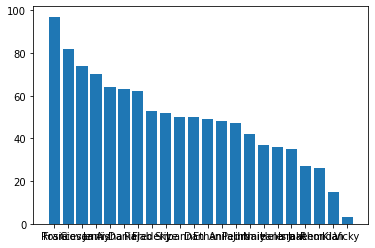

In [35]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade)

# Display the plot
plt.show()

##### %matplotlib inline: Ensure plots are displayed inline in the notebook
##### matplotlib (library), pyplot (class)
##### plt.bar(x = ..., height=...): Create a bar plot
##### plt.show():  Display the plot

##### to imporve the visual elements of the plot
##### 1. color of bar chart  (plt.bar(color)) 
##### 2. title (plt.title(str)) 
##### 3. X/Y labels (plt.xlabel(str))  
##### 4. grid (plt.grid(color, linestyle, linewidth, axis, alpha))  
##### 5. rotate X markers (plt.xticks(rotation))

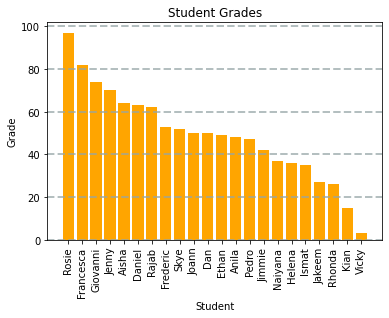

In [36]:
plt.bar(x=df_students.Name, height=df_students.Grade, color = 'orange')
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color = '#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

##### a plot is techinically contained with a Figure
##### creating a figure with a specific size: fig = plt.figure(figsize=(x,y))

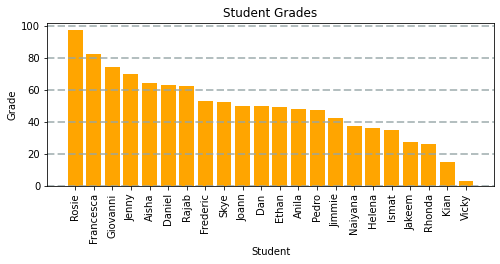

In [37]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

plt.bar(x=df_students.Name, height=df_students.Grade, color = 'orange')
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color = '#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

##### a figure can contain multiple subplots, each on its own axis
##### create a figure for n subplots (m row(s), n columns): fig, ax = plt.subplots(m, n, figsize=(x,y))

<ipython-input-38-1409b9b8fb47>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)
<ipython-input-38-1409b9b8fb47>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


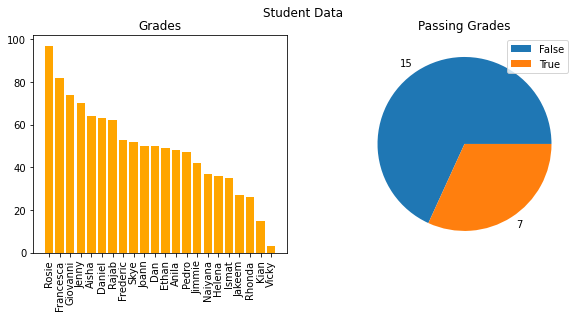

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

fig.suptitle('Student Data')

fig.show()

##### Series.value_counts(): returns a Series containing the counts of unique values. For any column in a dataframe, this method returns the count of unique entries in that column.
##### The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.
##### Series.keys(): Return alias for index.
##### .tolist(): turn array/ matrix to list

##### Matplotlib is foundational to graphics, so many packages provide methods abstracting the underlying Matplotlib functions and simplify plotting

<AxesSubplot:xlabel='Name'>

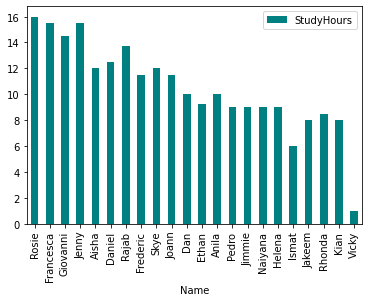

In [39]:
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

## Getting started with statistical analysis*

### Descriptive statistics and data distribution

##### histogram: to see how frequently each value for a variable occurs

<ipython-input-40-5564479df5a3>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


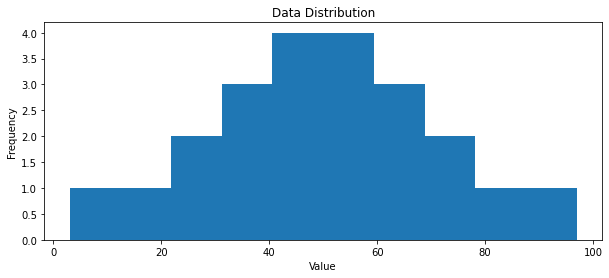

In [40]:
#Get the variable to examine
var_data = df_students['Grade']

fig = plt.figure(figsize=(10,4))

plt.hist(var_data)

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

fig.show()

##### the histogram for grades is a symmetric shape, where the most frequently occuring grades tend to be in the middle of the range, with fewer grades at the extreme ends of the scale

#### 1. Measures of central tendency
#### statistics representing the "middle" of the data, which is for finding a "typical" value
#### ways: 
#### a) mean: average  
#### b) median: in the middle of the range  
#### c) mode: most commonly occuring value
#### there may be a tie for the most common value: bimodal/ multimodal

Minimun:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximun:97.00



<ipython-input-41-2f673a064aaa>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


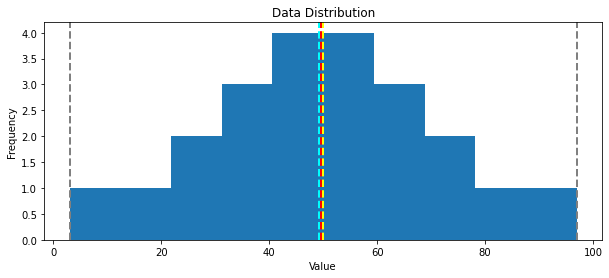

In [41]:
var = df_students['Grade']

min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimun:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximun:{:.2f}\n'.format(min_val, mean_val, med_val, mod_val, max_val))

fig = plt.figure(figsize=(10,4))

plt.hist(var)

plt.axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
plt.axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
plt.axvline(x=med_val, color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=mod_val, color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

fig.show()

##### another way to visualize the distribution of a variable: a box plot (a box-and-whiskers plot)

<ipython-input-42-ba2cc0aadd20>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


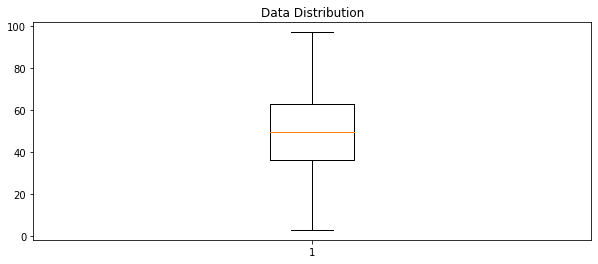

In [42]:
var = df_students['Grade']

fig = plt.figure(figsize=(10,4))

plt.boxplot(var)

plt.title('Data Distribution')

fig.show()

##### the box part shows where the inner 2 quartiles of the data reside
##### the whiskers extending from the box show the outer 2 quartiles
##### the line in the box indicates the "median" value 
##### combine hitogram and box plot, with box plot's orientation change to align it with histogram (hist: a "front elevation: view of the distribution, box plot: a "plan" view from the above)

Minimun:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximun:97.00



<ipython-input-43-5c64614120b1>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


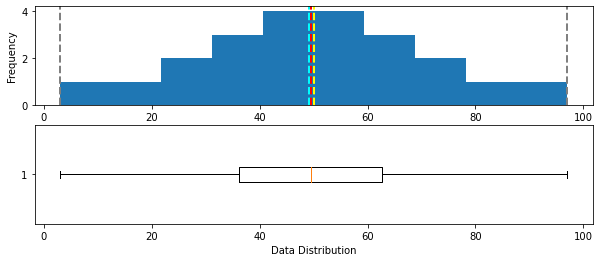

In [43]:
# Create a function to be re-used
def show_dis(var):
    from matplotlib import pyplot as plt
    
    min_val = var.min()
    max_val = var.max()
    mean_val = var.mean()
    med_val = var.median()
    mod_val = var.mode()[0]
    
    print('Minimun:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximun:{:.2f}\n'.format(min_val, mean_val, med_val, mod_val, max_val))
    
    fig, ax = plt.subplots(2, 1, figsize=(10,4))
    
    ax[0].hist(var)
    ax[0].set_ylabel('Frequency')
    
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mod_val, color='yellow', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)
    
    ax[1].boxplot(var, vert=False)
    ax[1].set_xlabel('Data Distribution')
    
    fig.show()
    
col = df_students['Grade']
show_dis(col)
    

##### probability density function estimating the distribution of grades for the full population
##### the Pandas DataFrame class provides a helpful plot function to show this density

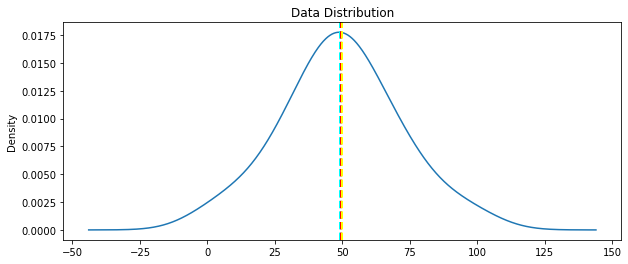

In [44]:
def show_density(var):
    from matplotlib import pyplot as plt
    
    fig = plt.figure(figsize=(10,4))
    
    var.plot.density()
    
    plt.title('Data Distribution')
    
    plt.axvline(x=var.mean(), color='cyan', linestyle='dashed', linewidth=2)
    plt.axvline(x=var.median(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(x=var.mode()[0], color='yellow', linestyle='dashed', linewidth=2)
    
    plt.show()
    
col = df_students['Grade']
show_density(col)

##### the density shows the characteristic "bell curve", a normal distribution with the mean and the mode at the center and symmetric tails

Minimun:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximun:16.00



<ipython-input-43-5c64614120b1>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


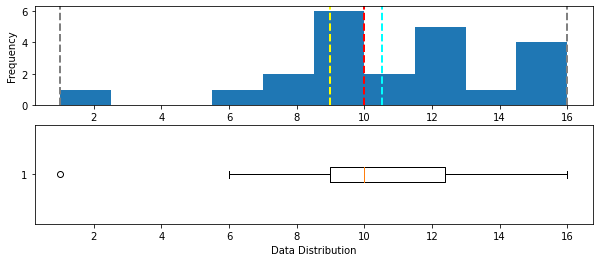

In [45]:
col = df_students['StudyHours']
show_dis(col)

##### the minimum is marked with an O, indicating an outlier, a value lying significantly outside the range of the rest of the distribution
##### a statistical anomaly doesn't represent a typical student

Minimun:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximun:16.00



<ipython-input-43-5c64614120b1>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


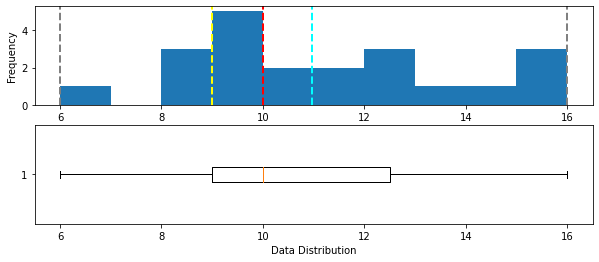

In [46]:
col = df_students[df_students.StudyHours>1]['StudyHours']
show_dis(col)

##### in most real-world cases, outliers usually fall below or above percentiles within which most of the data lie
##### Pandas quantile function: to exclude observations below/ above nth percentile

Minimun:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximun:16.00



<ipython-input-43-5c64614120b1>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


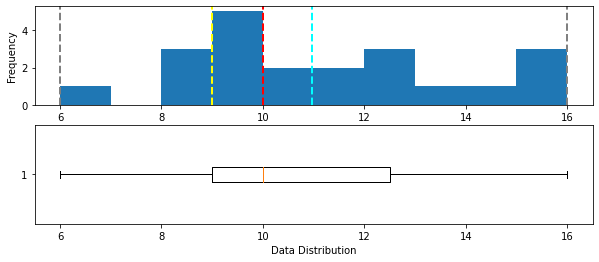

In [47]:
q01 = df_students.StudyHours.quantile(0.01)
col = df_students[df_students.StudyHours>q01]['StudyHours']
show_dis(col)

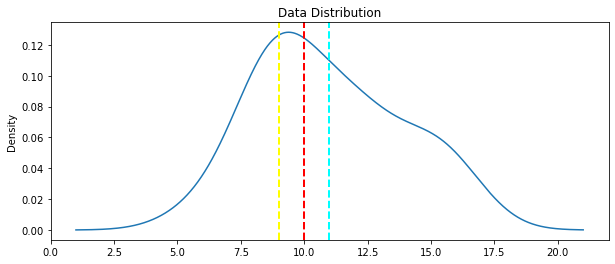

In [48]:
show_density(col)

##### this kind of distribution is called right skewed. The mass of the data is on the left side of the distribution, creating a long tail to the right 

#### 2. Measures of variance
#### how much variability is there in the data
#### typical statistics
#### a) range: the difference between max and min --> using min and max functions
#### b) variance: the average of the squared difference from the mean --> using built-in var function
#### c) standard deviation: the square root of the variance --> built-in std funtion

In [49]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('{}:\n -Range: {:.2f}\n -Variance: {:.2f}\n -Standard Deviation: {:.2f}\n'.format(col_name, rng, var, std))

Grade:
 -Range: 94.00
 -Variance: 472.54
 -Standard Deviation: 21.74

StudyHours:
 -Range: 15.00
 -Variance: 12.16
 -Standard Deviation: 3.49



##### The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean ( the data is more spread out) 

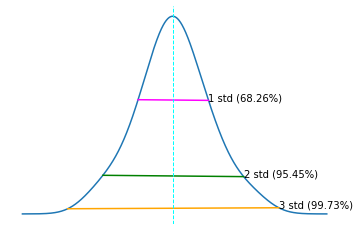

In [50]:
import scipy.stats as stats

col = df_students['Grade']

# Get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1, y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1], y1[1]))

# Annotate 2 stdev
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2, y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1], y2[1]))

# Annotate 3 stdev
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3, y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1], y3[1]))

plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')
plt.show()

##### in any normal disreibution:
##### approximately 68.26% of values fall within one standard deviation from the mean
##### 95.45%, 2 stdev
##### 99.73%, 3 stdev

##### DF.describe(): returning the main descriptive statistics for all numeric columns

In [51]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


## Comparing data
#### identify any apparent relationships between variables

##### remove outliers

In [52]:
q01 = df_students.StudyHours.quantile(0.01)
df_sample = df_students[df_students['StudyHours']>q01]
df_sample

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


### Comparing numeric and categorical variables

<AxesSubplot:title={'center':'StudyHours'}, xlabel='Pass'>

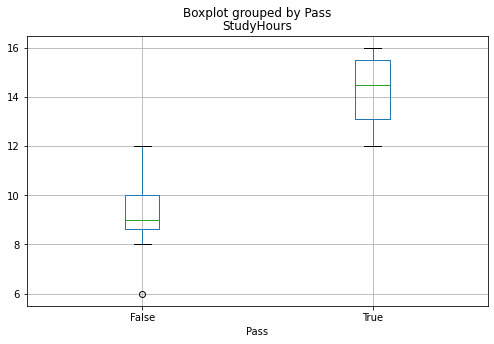

In [53]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

### Comparing numeric variables

<AxesSubplot:xlabel='Name'>

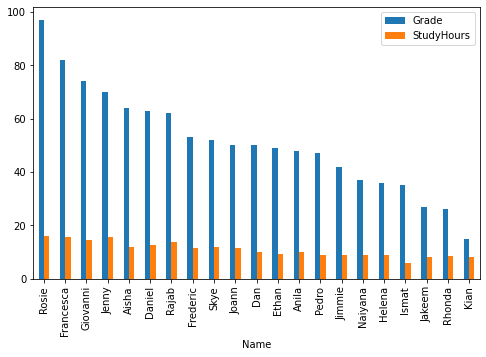

In [54]:
df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8,5))

##### normalize: when dealing with numeric data in different scales, so the values retian their proportional distribution, but are measured on the same scale
##### MinMax scaling: distributin values proportionally on a scale of 0 to 1.
##### Scickit-Learn library: MinMaxScaler() provides a scaler

<AxesSubplot:xlabel='Name'>

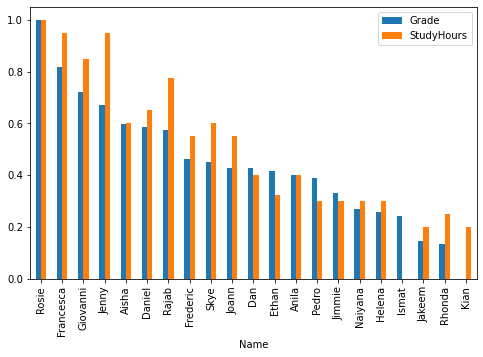

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalized the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

df_normalized.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8,5))

##### a statistical correlation measurement used to quantify the relationship between columns
##### the correlation statistics is a value between -1 and 1 indicating the strength of a relationship
##### values above 0 indicate a positive correlation (high values of one variable tend to coincide with high values of the other)
##### while values below 0 indicate a negative correlation (high values of one variable tend to coincide with low values the other)
##### correlation is not causation

In [56]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789672

##### another way to visualize the apparent correlation between 2 numeric columns is to use a scatter plot

<AxesSubplot:title={'center':'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

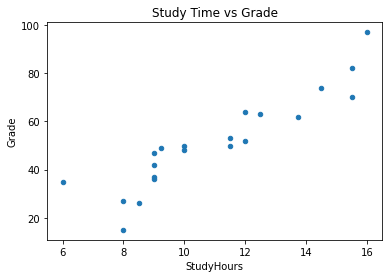

In [57]:
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

##### adding a regression line (a line of  best fit) showiing the general trend in the data
##### least squares regression
##### slope-intercept form of linear quation: y = mx + b
#####  y, x arr the coordinate variables
#####  m is the slope of the line
#####  b is the y-intercept (where the line goes through the Y axis)
#####  the straight line lying closest to the points
#####  the difference between the original y value and the f(x) value is the "error" between our regression line and the actual y value. 
#####  to get a line with the lowest overall error (the sum of the squared errors)
##### SciPy package includes a "stats" class providing a "linregress" method
#####  stats.linregress returns (among other things) the coefficients - slope(m) and intercept(b) based on a given pair of variable samples 

slope: 6.3134
y-intercept: -17.9164
so... 
 f(x) = 6.3134x + (-17.9164)


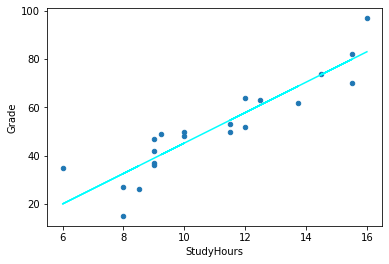

In [58]:
from scipy import stats

df_reg = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p , se = stats.linregress(df_reg['StudyHours'], df_reg['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so... \n f(x) = {:.4f}x + ({:.4f})'.format(m,b))

df_reg['fx'] = (m * df_reg['StudyHours']) + b

df_reg['error'] = df_reg['fx'] - df_reg['Grade']

df_reg.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_reg['StudyHours'], df_reg['fx'], color='cyan')

plt.show()

### Using the regression coefficients for prediction

In [61]:
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14

prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100, prediction))

print('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 14 hours per week may result in a grade of 70
